In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import functools

In [2]:
#pre-interpolated data
#(made a copy of this in my directory... filename is probably not what you have Gabs)
all_clean_data = pd.read_csv('all_clean_data-Copy1.csv', parse_dates=['Date'])
all_clean_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ObservationID', 'ObservationTime',
       'Date', 'ObservationTimeApproximate', 'Troop', 'Observer',
       'ObservationType', 'UTMNorthing', 'UTMEasting', 'LocationApproximate',
       'LocationDescription', 'Notes', 'ST', 'STUncertain', 'SM',
       'SMUncertain', 'SF', 'SFUncertain', 'SU', 'SUUncertain', 'SA',
       'SAUncertain', 'SAM', 'SAMUncertain', 'SAF', 'SAFUncertain', 'SAFP',
       'SAFPUncertain', 'SAFL', 'SAFLUncertain', 'SAFEN', 'SAFENUncertain',
       'SAU', 'SAUUncertain', 'SS', 'SSUncertain', 'SSM', 'SSMUncertain',
       'SSF', 'SSFUncertain', 'SSU', 'SSUUncertain', 'SJ', 'SJUncertain',
       'SJM', 'SJMUncertain', 'SJF', 'SJFUncertain', 'SJU', 'SJUUncertain',
       'IT', 'ITUncertain', 'IM', 'IMUncertain', 'IF', 'IFUncertain', 'IU',
       'IUUncertain', 'IA', 'IAUncertain', 'IAM', 'IAMUncertain', 'IAF',
       'IAFUncertain', 'IAFP', 'IAFPUncertain', 'IAFL', 'IAFLUncertain',
       'IAFEN', 'IAFENUncertain', 'IAU', 'IAUUnce

In [3]:
#gabrielle's function to add tdate, tdint and quarter (for pre-interpolated data)
def add_tdate(df):
    ##ADDS TDATE, TDINT, AND QUARTER COLUMNS
    
    
    ##Functionality for full (multitroop) dataframes
    try:
        troop_names = df.loc[~df.Troop.str.contains('/')].Troop.unique()

        df.loc[:,'tdate'] = 0
        df.loc[:,'tdint'] = 0
        
        def add_qtr(x):
            if x.month in [11,12,1]:
                return 1
            elif x.month in [2,3,4]:
                return 2
            elif x.month in [5,6,7]:
                return 3
            else:
                return 4

        df.loc[:,'quarter'] = df.loc[:,'Date'].apply(lambda x: add_qtr(x))
        
        

        for troop in troop_names:

            td = df.loc[df.Troop.str.contains(troop)]
            
            #td.loc[:,'tdint'] = td.Date.apply(lambda x: x.year)
            #td.loc[:,'tdint'] -= td.loc[:,'tdint'].iloc[0]
            
            ###ecount identifies first incomplete year
            ecount = 0
            ###Counter assigns tdint value
            counter = 0

            for year in td.ObsYear.unique():
                ##Finds full single Nov-start year for a troop
                wd = td.loc[(td.Date >= datetime.datetime(int(year),11,1))&(td.Date < datetime.datetime(int(year)+1,11,1))]

                ##Special handling for data that doesn't have a full Nov-start year at beginning of troop data
                if ecount == 0:
                    ed = td.loc[td.Date<datetime.datetime(int(year),11,1)]
                    ed.loc[:,'tdate'] = ed.loc[:,'Date'].apply(lambda x: (int(x.strftime('%j'))-305+365)/365)
                    ed.loc[:,'tdint'] = -1
                    ecount+=1

                try:
                    ##Converts date to a percentage number (0,1) based on Nov-start year Nov 1 = 0 and Oct 31 = 0.99 
                    wd.loc[:,'tdate'] = wd.loc[:,'Date'].apply(lambda x: (int(x.strftime('%j'))-305)/365 if x <= datetime.datetime(int(year),12,31) else (int(x.strftime('%j'))-305+365)/365)
                    wd.loc[:,'tdint'] = counter
                    counter += 1
                    df.update(wd)
                    df.update(ed)
                except:
                    raise Exception('There is an error updating input dataframe in add_tdate function.')
                    
                    
                    
    ##Functionality for single troop dataframes
    ##MUST HAVE DATE COLUMN
    ##For single troop data, will not add tdint based on iterations
        ##Will pull unique years from Date column
    except:
        
        df.loc[:,'tdate'] = 0
        df.loc[:,'tdint'] = 0
        
        def add_qtr(x):
            if x.month in [11,12,1]:
                return 1
            elif x.month in [2,3,4]:
                return 2
            elif x.month in [5,6,7]:
                return 3
            else:
                return 4

        df.loc[:,'quarter'] = df.loc[:,'Date'].apply(lambda x: add_qtr(x))
        
        

        td = df.copy()
        ###ecount identifies first incomplete year
        ecount = 0
        ###Counter assigns tdint value
        counter = 0
    
        for year in td.loc[:,'Date'].apply(lambda x: x.year).unique():
            ##Finds full single Nov-start year for a troop
            wd = td.loc[(td.Date >= datetime.datetime(int(year),11,1))&(td.Date < datetime.datetime(int(year)+1,11,1))]

            ##Special handling for data that doesn't have a full Nov-start year at beginning of troop data
            if ecount == 0:
                ed = td.loc[td.loc[:,'Date']<datetime.datetime(int(year),11,1)]
                ed.loc[:,'tdate'] = ed.loc[:,'Date'].apply(lambda x: (int(x.strftime('%j'))-305+365)/365)
                ed.loc[:,'tdint'] = -1
                ecount+=1

            try:
                ##Converts date to a percentage number (0,1) based on Nov-start year Nov 1 = 0 and Oct 31 = 0.99 
                wd.loc[:,'tdate'] = wd.loc[:,'Date'].apply(lambda x: (int(x.strftime('%j'))-305)/365 if x <= datetime.datetime(int(year),12,31) else (int(x.strftime('%j'))-305+365)/365)
                wd.loc[:,'tdint'] = counter
                counter += 1
                df.update(wd)
                df.update(ed)
            except:
                raise Exception('There is an error updating input dataframe in add_tdate function.')

    
    
    return df

In [4]:
#add tdate, tdint, quarter
all_clean_data_td = add_tdate(all_clean_data)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [5]:
all_clean_data_td.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ObservationID', 'ObservationTime',
       'Date', 'ObservationTimeApproximate', 'Troop', 'Observer',
       'ObservationType', 'UTMNorthing',
       ...
       'A', 'S', 'J', 'TimeSinceLast', 'TDiff', 'ObsYear', 'ObsMonth', 'tdate',
       'tdint', 'quarter'],
      dtype='object', length=101)

In [6]:
#only quarters 3 and 4
all_clean_data_td=all_clean_data_td.loc[(all_clean_data_td.quarter > 2)]
all_clean_data_td.Troop

0         CGL
1         CCH
2         MOW
3         CCH
4         CSL
        ...  
2895    WPLAT
2896    WPLAT
2897    WPLAT
2898    WPLAT
2899    WPLAT
Name: Troop, Length: 1448, dtype: object

In [27]:
#pick out one troop-year as an example
all_clean_data_sub = all_clean_data_td.loc[(all_clean_data_td.Troop.str.contains('CCH')) & 
               (all_clean_data_td.tdint == 0)]
all_clean_data_sub.head()

,Unnamed: 0,Unnamed: 0.1,ObservationID,ObservationTime,Date,ObservationTimeApproximate,Troop,Observer,ObservationType,UTMNorthing,...,A,S,J,TimeSinceLast,TDiff,ObsYear,ObsMonth,tdate,tdint,quarter
994,994.0,2558.0,cch0905300815,5/30/09 8:15,2009-05-30,0.0,CCH,Pete Laver,Sunning,8027907.0,...,NaN,NaN,NaN,30 days 00:00:00.000000000,-6.0,2009.0,5.0,0.575342,0.0,3.0
1007,1007.0,2579.0,cch0906030756,6/3/09 7:56,2009-06-03,0.0,CCH,Pete Laver,Sunning,8027907.0,...,NaN,NaN,NaN,4 days 00:00:00.000000000,-4.0,2009.0,6.0,0.586301,0.0,3.0
1008,1008.0,2583.0,cch0906031225,6/3/09 12:25,2009-06-03,0.0,CCH,Pete Laver,Moving,8028176.0,...,NaN,NaN,NaN,0 days 00:00:00.000000000,6.0,2009.0,6.0,0.586301,0.0,3.0
1011,1011.0,2588.0,cch0906081555,6/8/09 15:55,2009-06-08,0.0,CCH,Pete Laver,Foraging,8028020.0,...,NaN,NaN,NaN,5 days 00:00:00.000000000,-4.0,2009.0,6.0,0.600000,0.0,3.0
1016,1016.0,2708.0,cch0906171115,6/17/09 11:15,2009-06-17,0.0,CCH,Pete Laver,Moving,8027999.0,...,NaN,NaN,NaN,9 days 00:00:00.000000000,-3.0,2009.0,6.0,0.624658,0.0,3.0


In [28]:
print(all_clean_data_sub.columns.values)

['Unnamed: 0' 'Unnamed: 0.1' 'ObservationID' 'ObservationTime' 'Date'
 'ObservationTimeApproximate' 'Troop' 'Observer' 'ObservationType'
 'UTMNorthing' 'UTMEasting' 'LocationApproximate' 'LocationDescription'
 'Notes' 'ST' 'STUncertain' 'SM' 'SMUncertain' 'SF' 'SFUncertain' 'SU'
 'SUUncertain' 'SA' 'SAUncertain' 'SAM' 'SAMUncertain' 'SAF'
 'SAFUncertain' 'SAFP' 'SAFPUncertain' 'SAFL' 'SAFLUncertain' 'SAFEN'
 'SAFENUncertain' 'SAU' 'SAUUncertain' 'SS' 'SSUncertain' 'SSM'
 'SSMUncertain' 'SSF' 'SSFUncertain' 'SSU' 'SSUUncertain' 'SJ'
 'SJUncertain' 'SJM' 'SJMUncertain' 'SJF' 'SJFUncertain' 'SJU'
 'SJUUncertain' 'IT' 'ITUncertain' 'IM' 'IMUncertain' 'IF' 'IFUncertain'
 'IU' 'IUUncertain' 'IA' 'IAUncertain' 'IAM' 'IAMUncertain' 'IAF'
 'IAFUncertain' 'IAFP' 'IAFPUncertain' 'IAFL' 'IAFLUncertain' 'IAFEN'
 'IAFENUncertain' 'IAU' 'IAUUncertain' 'IS' 'ISUncertain' 'ISM'
 'ISMUncertain' 'ISF' 'ISFUncertain' 'ISU' 'ISUUncertain' 'IJ'
 'IJUncertain' 'IJM' 'IJMUncertain' 'IJF' 'IJFUncertain' 'IJU'


In [29]:
#get the max troop size
max1 = all_clean_data_sub['T'].max()
max1

37.0

In [30]:
#index of the max troop size
max1idx = all_clean_data_sub['T'].idxmax()
max1idx

1008

In [31]:
#second maximum (excluding the first one just identified)
max2 = all_clean_data_sub['T'][all_clean_data_sub.index!=all_clean_data_sub['T'].idxmax()].max()
max2

36.0

In [32]:
#index of second maximum
max2idx = all_clean_data_sub['T'][all_clean_data_sub.index!=all_clean_data_sub['T'].idxmax()].idxmax()
max2idx

1056

In [33]:
#get the dates of the two maxima
maxima_tdates = [all_clean_data_sub['tdate'][max1idx],all_clean_data_sub['tdate'][max2idx]]
maxima_tdates

[0.5863013698630137, 0.736986301369863]

In [34]:
#drop the troop counts that fall between the dates of the two maxima
new_data = all_clean_data_sub[-((all_clean_data_sub['tdate'] > min(maxima_tdates)) & (all_clean_data_sub['tdate'] < max(maxima_tdates)))]
new_data

,Unnamed: 0,Unnamed: 0.1,ObservationID,ObservationTime,Date,ObservationTimeApproximate,Troop,Observer,ObservationType,UTMNorthing,...,A,S,J,TimeSinceLast,TDiff,ObsYear,ObsMonth,tdate,tdint,quarter
994,994.0,2558.0,cch0905300815,5/30/09 8:15,2009-05-30,0.0,CCH,Pete Laver,Sunning,8027907.0,...,NaN,NaN,NaN,30 days 00:00:00.000000000,-6.0,2009.0,5.0,0.575342,0.0,3.0
1007,1007.0,2579.0,cch0906030756,6/3/09 7:56,2009-06-03,0.0,CCH,Pete Laver,Sunning,8027907.0,...,NaN,NaN,NaN,4 days 00:00:00.000000000,-4.0,2009.0,6.0,0.586301,0.0,3.0
1008,1008.0,2583.0,cch0906031225,6/3/09 12:25,2009-06-03,0.0,CCH,Pete Laver,Moving,8028176.0,...,NaN,NaN,NaN,0 days 00:00:00.000000000,6.0,2009.0,6.0,0.586301,0.0,3.0
1056,1056.0,5582.0,cch0907280928,7/28/09 9:28,2009-07-28,0.0,CCH,Pete Laver,Foraging,8027905.0,...,NaN,NaN,NaN,14 days 00:00:00.000000000,16.0,2009.0,7.0,0.736986,0.0,3.0
1076,1076.0,6242.0,cch0908201235,8/20/09 12:35,2009-08-20,0.0,CCH,Pete Laver,Resting,8027860.0,...,NaN,NaN,NaN,23 days 00:00:00.000000000,-1.0,2009.0,8.0,0.800000,0.0,4.0
1077,1077.0,6277.0,cch0908201617,8/20/09 16:17,2009-08-20,0.0,CCH,Pete Laver,Foraging,8027893.0,...,NaN,NaN,NaN,0 days 00:00:00.000000000,-10.0,2009.0,8.0,0.800000,0.0,4.0
1100,1100.0,7348.0,cch0909151004,9/15/09 10:04,2009-09-15,0.0,CCH,Pete Laver,Foraging,8027905.0,...,NaN,NaN,NaN,26 days 00:00:00.000000000,2.0,2009.0,9.0,0.871233,0.0,4.0
1135,1135.0,7661.0,cch0909290710,9/29/09 7:10,2009-09-29,0.0,CCH,Pete Laver,Denning,8027885.0,...,NaN,NaN,NaN,14 days 00:00:00.000000000,-9.0,2009.0,9.0,0.909589,0.0,4.0
1153,1153.0,7915.0,cch0910201635,10/20/09 16:35,2009-10-20,0.0,CCH,Pete Laver,Foraging,8027903.0,...,12.0,5.0,NaN,21 days 00:00:00.000000000,-1.0,2009.0,10.0,0.967123,0.0,4.0
1162,1162.0,8005.0,cch0910271555,10/27/09 15:55,2009-10-27,0.0,CCH,Pete Laver,Forage/Rest,8027974.0,...,8.0,14.0,NaN,7 days 00:00:00.000000000,5.0,2009.0,10.0,0.986301,0.0,4.0


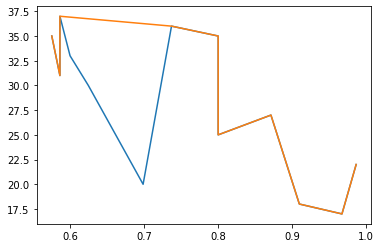

In [35]:
plt.plot('tdate','T', data=all_clean_data_sub)
plt.plot('tdate','T', data=new_data)

plt.show()